In [3]:
# House Sales Data, ETL, Build Predictive Model(linear regression), 
# Assess Model, Deploy Model   'houseSmallData.csv' and "data_description.txt"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### data_description.txt
SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.  
MSSubClass — The building class  
MSZoning — The general zoning classification 
MasVnrArea - Masonary Veneer Area in sq ft
LotFrontage — Linear feet of street connected to property  
LotArea — Lot size in square feet  
Street — Type of road access  
Alley — Type of alley access  
LotShape — General shape of property  
LandContour — Flatness of the property  
Utilities — Type of utilities available  
LotConfig — Lot configuration  

$$Y = X_{1}\beta_{1} + X_{2}\beta_{2} + X_{3}\beta_{3}...$$

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/chunleiy/PS4HouseDataExercise/master/train.csv')
print(data.shape)
train = data.iloc[0:1000,:]

train.to_json('housedata.json')
train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# New Section

In [5]:
# investigate Sale Price
train['SalePrice']

0      208500
1      181500
2      223500
3      140000
4      250000
        ...  
995    121600
996    136500
997    185000
998     91000
999    206000
Name: SalePrice, Length: 1000, dtype: int64

(array([ 99., 493., 254.,  93.,  38.,  15.,   4.,   2.,   1.,   1.]),
 array([ 34900., 106910., 178920., 250930., 322940., 394950., 466960.,
        538970., 610980., 682990., 755000.]),
 <a list of 10 Patch objects>)

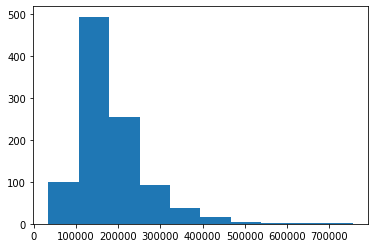

In [6]:
# plot hist
plt.hist(train['SalePrice'])

In [7]:
# select numeric columns
# calculate correlation factor
numeric = train.select_dtypes(include=[np.number])
print(numeric)
numeric.shape

       Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0       1          60         65.0     8450            7            5   
1       2          20         80.0     9600            6            8   
2       3          60         68.0    11250            7            5   
3       4          70         60.0     9550            7            5   
4       5          60         84.0    14260            8            5   
..    ...         ...          ...      ...          ...          ...   
995   996          50         51.0     4712            4            7   
996   997          20          NaN    10659            5            6   
997   998          20          NaN    11717            6            6   
998   999          30         60.0     9786            3            4   
999  1000          20         64.0     6762            7            5   

     YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0         2003          2003       196.0         7

(1000, 38)

In [30]:
corr = numeric.corr()
cols = corr['SalePrice'].sort_values(ascending=False)[0:10].index
print(cols)
corr['SalePrice'].sort_values(ascending=False)[0:10]

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt'],
      dtype='object')


SalePrice       1.000000
OverallQual     0.797666
GrLivArea       0.734997
GarageCars      0.658204
GarageArea      0.647953
TotalBsmtSF     0.642127
1stFlrSF        0.627749
TotRmsAbvGrd    0.570375
FullBath        0.559980
YearBuilt       0.527193
Name: SalePrice, dtype: float64

In [15]:
# pick out X cols and Y = SalePricee
X = train[cols]
Y = train['SalePrice']
X = X.drop(['SalePrice'], axis = 1)
X

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,TotRmsAbvGrd,FullBath,YearBuilt
0,7,1710,2,548,856,856,8,2,2003
1,6,1262,2,460,1262,1262,6,2,1976
2,7,1786,2,608,920,920,6,2,2001
3,7,1717,3,642,756,961,7,1,1915
4,8,2198,3,836,1145,1145,9,2,2000
...,...,...,...,...,...,...,...,...,...
995,4,1230,1,305,747,774,5,1,1946
996,5,1050,1,368,1050,1050,6,1,1961
997,6,1442,2,615,1442,1442,6,2,1970
998,3,1077,1,210,1007,1077,6,1,1922


In [10]:
# no null value
X.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
TotRmsAbvGrd    0
FullBath        0
YearBuilt       0
dtype: int64

In [42]:
# buld Linear Regression Model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X, Y)
predictions = model.predict(X)

In [12]:
# How good is the model
model.score(X,Y)


0.8017385989284327

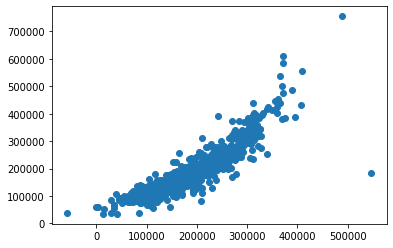

In [13]:
# Scatter plot of predictions
plt.scatter(predictions, Y)

In [18]:
# Load test data
test = pd.read_csv('https://raw.githubusercontent.com/chunleiy/PS4HouseDataExercise/master/test.csv')

In [19]:
test = test.iloc[:,:]

In [45]:
cols_test = cols.delete(0)
X_test = test[cols_test]

In [32]:
# test whether there is null 
X_test.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
TotRmsAbvGrd    0
FullBath        0
YearBuilt       0
dtype: int64

In [46]:
predictions_test = model.predict(X_test)

In [39]:
from google.colab import files
d = {'Id': test.Id, 'SalePrice': predictions_test}
df = pd.DataFrame(data=d)
df.to_csv('predictions.csv', index=False)
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>